# `appartments` for **regression**

# Exploratory Data Analysis (EDA)

## Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

from joblib import dump


## Load the dataset `apartments`

In [50]:
#os.chdir("/Users/engkahhui/Downloads/ML/Project")

In [46]:
df = pd.read_csv("data/appartments_train.csv")

In [47]:
df_test = pd.read_csv("data/appartments_test.csv")

### Data Overview

In [48]:
# Shape and data types
print(df.shape, "\n")
print(df.dtypes, "\n")

# Preview first 10 rows of data
df.head(10)

(156454, 34) 

unit_id                        object
obj_type                       object
dim_m2                        float64
n_rooms                       float64
floor_no                      float64
floor_max                     float64
year_built                    float64
dist_centre                   float64
n_poi                         float64
dist_sch                      float64
dist_clinic                   float64
dist_post                     float64
dist_kind                     float64
dist_rest                     float64
dist_uni                      float64
dist_pharma                   float64
own_type                       object
build_mat                      object
cond_class                     object
has_park                       object
has_balcony                    object
has_lift                       object
has_sec                        object
has_store                      object
price_z                       float64
src_month                      obje

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
0,a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,...,519626.21,2023-09,693f303c,501710.76,14.02,95.39,44.51,0.999,13.99,100.291946
1,23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,...,162959.26,2024-04,8d5a4f0c,147763.87,110.55,46.17,56.25,1.000,7.59,91.315644
2,d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,...,1167571.51,2023-10,693f303c,1042847.59,31.15,18.94,50.36,0.999,21.14,93.681619
3,280aced4655b7a96,2a6d5c01,53.68,2.0,NaN,4.0,2018.0,10.589,30.0,0.729,...,907071.16,2024-01,693f303c,728839.39,7.52,11.84,46.69,0.999,7.91,94.192062
4,2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,...,1080383.19,2023-11,693f303c,1263171.15,11.20,89.64,45.60,0.999,8.63,96.166051
5,912d301b714b38c1,NaN,38.68,2.0,2.0,2.0,2001.0,6.146,7.0,0.140,...,449452.59,2023-12,0ab06839,470640.01,25.00,81.41,52.03,0.999,17.77,93.686788
6,3180d50e3713c0c7,0d6c4dfc,53.23,3.0,4.0,4.0,1966.0,4.370,21.0,0.173,...,916769.77,2024-01,693f303c,736040.36,68.34,51.67,41.72,1.000,23.79,93.188944
7,fea98eddfcd78411,0d6c4dfc,68.31,3.0,2.0,4.0,2000.0,3.999,9.0,0.445,...,781465.19,2024-02,0ab06839,793908.70,12.15,6.63,58.20,1.000,29.52,105.506474
8,feb9765152fa05d8,0c238f18,64.16,3.0,2.0,4.0,1955.0,4.957,32.0,0.064,...,851403.65,2024-01,693f303c,810187.51,54.36,61.98,56.73,1.000,12.32,92.800060
9,b329fdc5840aa1fb,NaN,41.27,2.0,3.0,4.0,1965.0,2.047,8.0,0.102,...,280262.43,2024-02,765f79ed,308484.28,41.67,19.60,61.34,1.000,9.62,105.780000


In [49]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

cond_class                    117058
build_mat                      61999
obj_type                       33820
floor_no                       27698
year_built                     25713
infrastructure_quality         25713
has_lift                        7727
dist_uni                        4317
floor_max                       1921
dist_clinic                      571
dist_rest                        391
dist_pharma                      219
dist_post                        188
dist_kind                        163
dist_sch                         130
price_z                            0
neighborhood_crime_rate            0
popularity_index                   0
green_space_ratio                  0
market_volatility                  0
loc_code                           0
estimated_maintenance_cost         0
src_month                          0
unit_id                            0
has_store                          0
has_sec                            0
has_balcony                        0
h

In [50]:
# View missing counts and percentages
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_pct})
missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

,Missing Count,Missing %
cond_class,117058,74.819436
build_mat,61999,39.627622
obj_type,33820,21.616577
floor_no,27698,17.703606
year_built,25713,16.434863
infrastructure_quality,25713,16.434863
has_lift,7727,4.938832
dist_uni,4317,2.759277
floor_max,1921,1.227837
dist_clinic,571,0.364964


In [51]:
# Summary statistics before data cleaning
df.describe()

,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,...,dist_uni,dist_pharma,price_z,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
count,156454.000000,156454.000000,128756.000000,154533.000000,130741.000000,156454.000000,156454.000000,156324.000000,155883.000000,156266.000000,...,152137.000000,156235.000000,1.564540e+05,1.564540e+05,130741.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000
mean,58.702447,2.678634,3.334749,5.312859,1986.010532,4.357027,20.611509,0.413302,0.970588,0.516677,...,1.444837,0.358150,7.848080e+05,7.845504e+05,38.099861,49.878525,50.015030,0.999626,17.600377,99.671328
std,23.278725,0.916015,2.535675,3.311659,33.792722,2.900580,24.212745,0.469380,0.901307,0.505063,...,1.124728,0.462408,4.301655e+05,4.422421e+05,37.007349,28.842192,10.033264,0.000489,10.064985,5.879228
min,18.780000,1.000000,1.000000,1.000000,1850.000000,0.008000,0.000000,0.002000,0.001000,0.001000,...,0.004000,0.001000,1.196369e+05,1.012951e+05,0.000000,0.000000,7.830000,0.998000,2.060000,89.913197
25%,42.240000,2.000000,2.000000,3.000000,1967.000000,2.000000,7.000000,0.174000,0.353000,0.236000,...,0.569000,0.140000,5.027801e+05,4.931332e+05,7.990000,24.880000,43.270000,0.999000,10.190000,93.801401
50%,54.240000,3.000000,3.000000,4.000000,1994.000000,3.935000,14.000000,0.288000,0.669000,0.392000,...,1.110000,0.238000,6.901935e+05,6.854957e+05,27.530000,49.840000,49.990000,1.000000,15.560000,100.374251
75%,69.820000,3.000000,4.000000,6.000000,2016.000000,6.128000,24.000000,0.469000,1.245000,0.623000,...,2.067000,0.407000,9.450128e+05,9.498584e+05,58.250000,74.880000,56.790000,1.000000,22.660000,105.234633
max,187.310000,6.000000,29.000000,29.000000,2024.000000,19.686000,212.000000,5.718000,5.818000,5.864000,...,5.982000,5.752000,3.921745e+06,4.666297e+06,252.720000,100.000000,95.360000,1.000000,87.200000,109.224288


## Data Cleaning and Missing data handling
Since the percentage of missing data in `cond_class` is too high (approx. 
75%) , this column is dropped.

For **categorical** columns, missing `build_mat` and `obj_type` values will be filled with `missing` placeholder.

For **numerical** columns, `floor_no`, `year_built`, `infrastructure_quality`, `dist_uni`, `floor_max`, `dist_clinic` & `dist_sch` will be filled with median.

For **boolean** columns, `has_lift` will be filled with mode of `True` or `False`.

In [52]:
# Training data
# Drop cond_class
df.drop(columns=["cond_class"], inplace=True)

# Fill categorical column with 'missing'
df["build_mat"] = df["build_mat"].fillna("missing")
df["obj_type"] = df["obj_type"].fillna("missing")

In [53]:
# Test data
# Drop cond_class
df_test.drop(columns=["cond_class"], inplace=True)

# Fill categorical column with 'missing'
df_test["build_mat"] = df["build_mat"].fillna("missing")
df_test["obj_type"] = df["obj_type"].fillna("missing")

In [54]:
cols_to_fill_with_median = ["floor_no", "year_built", "infrastructure_quality", "dist_uni", "floor_max", "dist_clinic", "dist_rest", 
                            "dist_pharma", "dist_post", "dist_kind", "dist_sch"]

for col in cols_to_fill_with_median:
    df[col] = df[col].fillna(df[col].median())

for col in cols_to_fill_with_median:
    df_test[col] = df_test[col].fillna(df_test[col].median())

In [55]:
df["has_lift"] = df["has_lift"].fillna(df["has_lift"].mode()[0])
df_test["has_lift"] = df_test["has_lift"].fillna(df_test["has_lift"].mode()[0])

In [56]:
# Confirm no missing values in both training and test data
df.isnull().sum().sort_values(ascending=False)
df_test.isnull().sum().sort_values(ascending=False)

unit_id                       0
obj_type                      0
estimated_maintenance_cost    0
green_space_ratio             0
popularity_index              0
neighborhood_crime_rate       0
infrastructure_quality        0
market_volatility             0
loc_code                      0
src_month                     0
has_store                     0
has_sec                       0
has_lift                      0
has_balcony                   0
has_park                      0
build_mat                     0
own_type                      0
dist_pharma                   0
dist_uni                      0
dist_rest                     0
dist_kind                     0
dist_post                     0
dist_clinic                   0
dist_sch                      0
n_poi                         0
dist_centre                   0
year_built                    0
floor_max                     0
floor_no                      0
n_rooms                       0
dim_m2                        0
global_e

## Data Visualisation
### Correlation Analysis on features
For numerical features, correlation matrix is built to see if there are correlation between features as *multicollinearity* might affect the model.

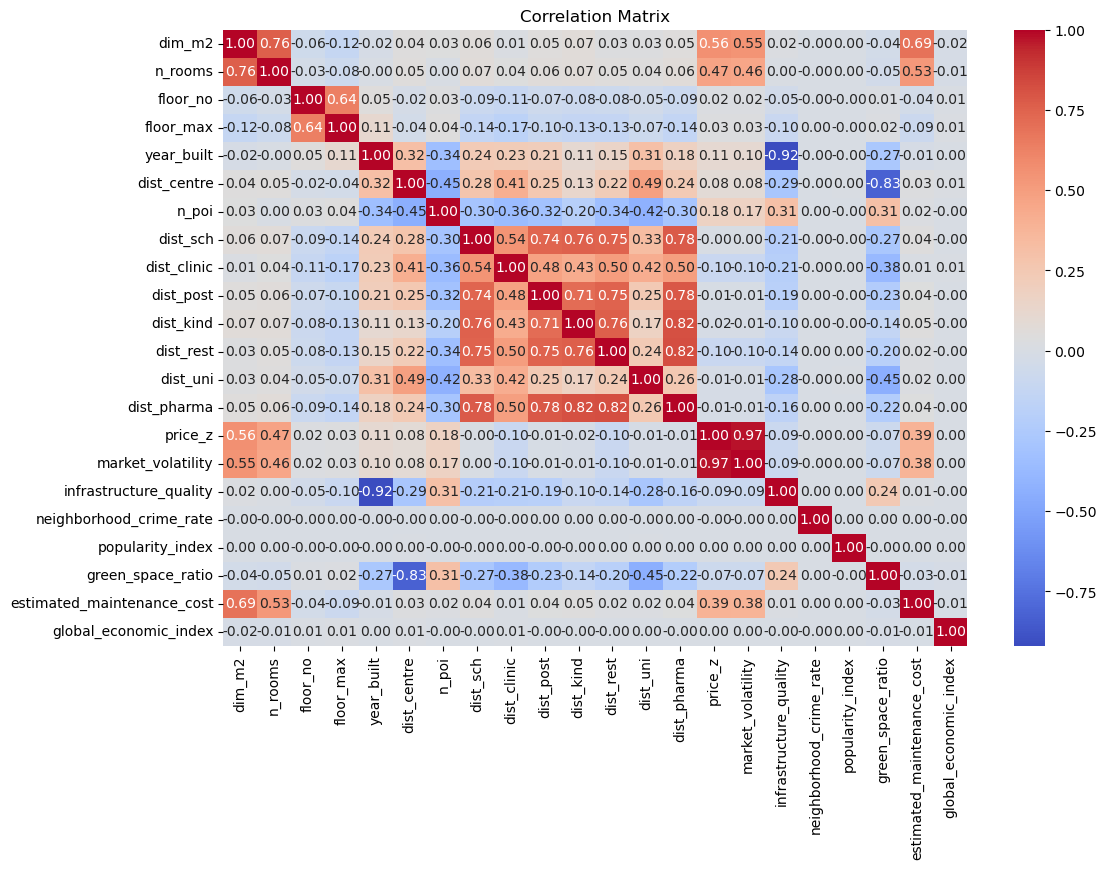

In [57]:
# Correlation matrix to check linear relationships
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

### Data Distribution Visualisation

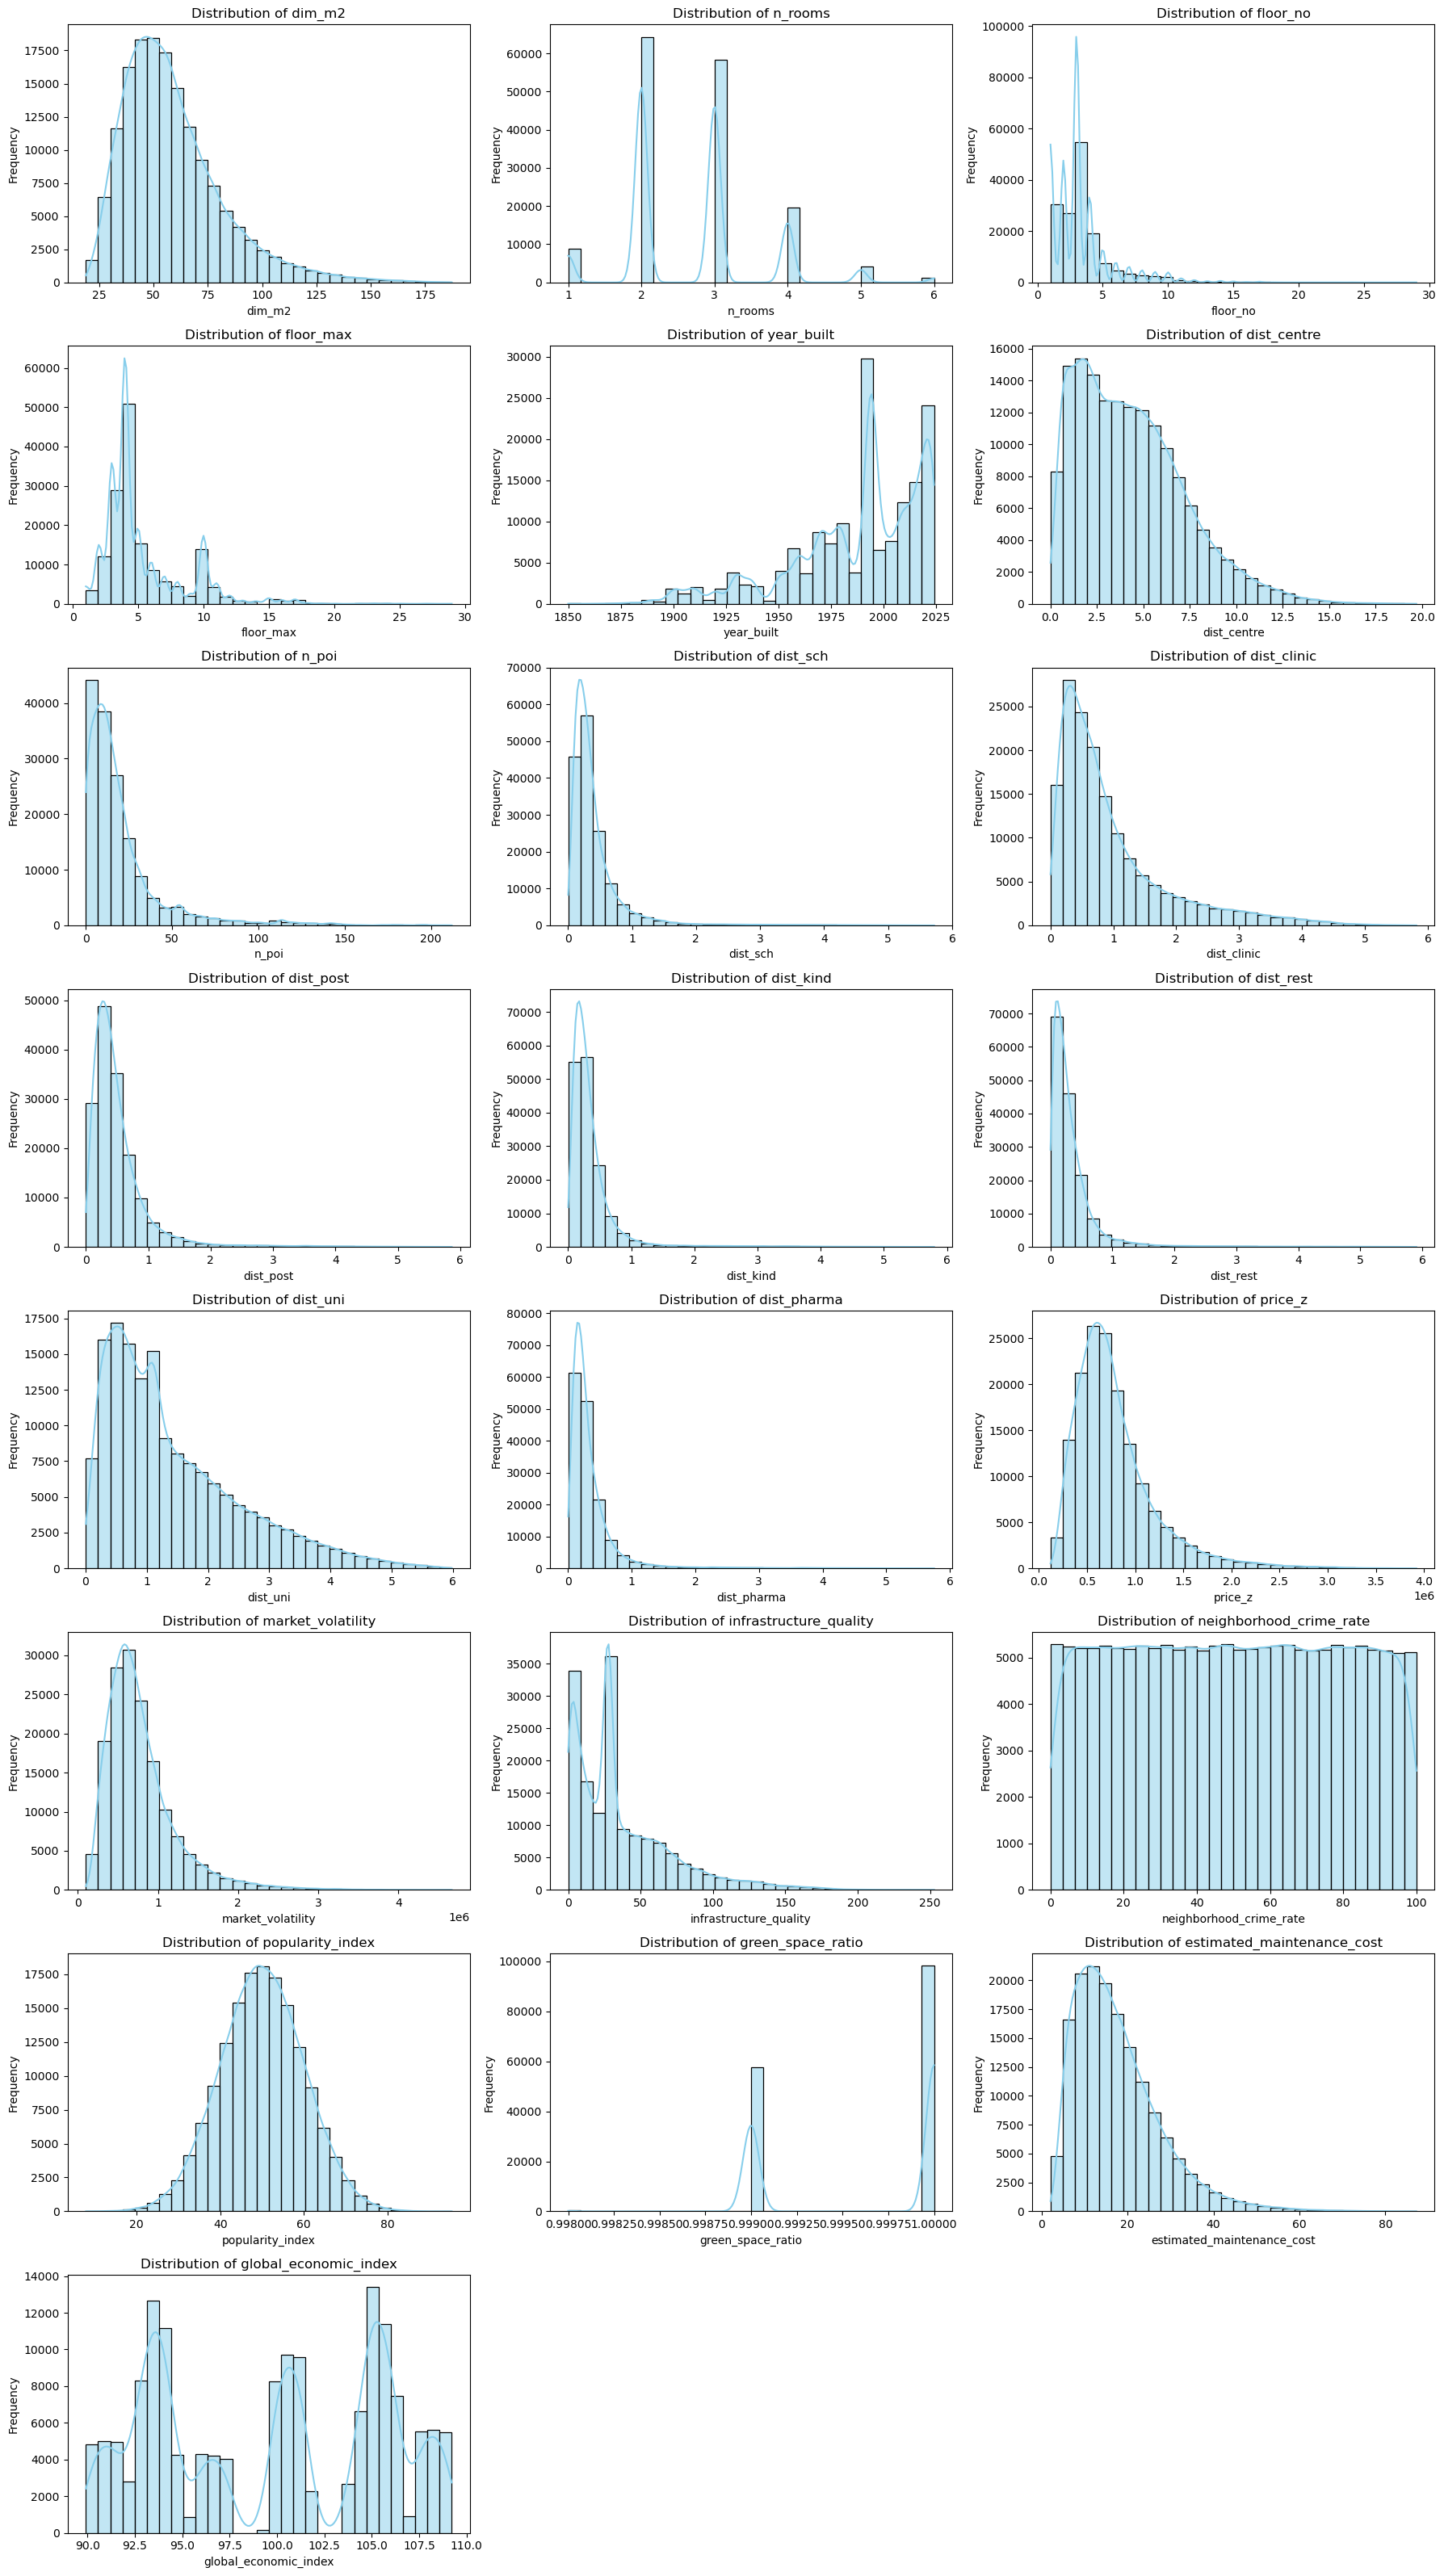

In [58]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Set the number of columns per row in the plot grid
cols_per_row = 3
n_plots = len(numeric_cols)
n_rows = (n_plots + cols_per_row - 1) // cols_per_row

# Set figure size and layout
plt.figure(figsize=(cols_per_row * 6, n_rows * 4))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, cols_per_row, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


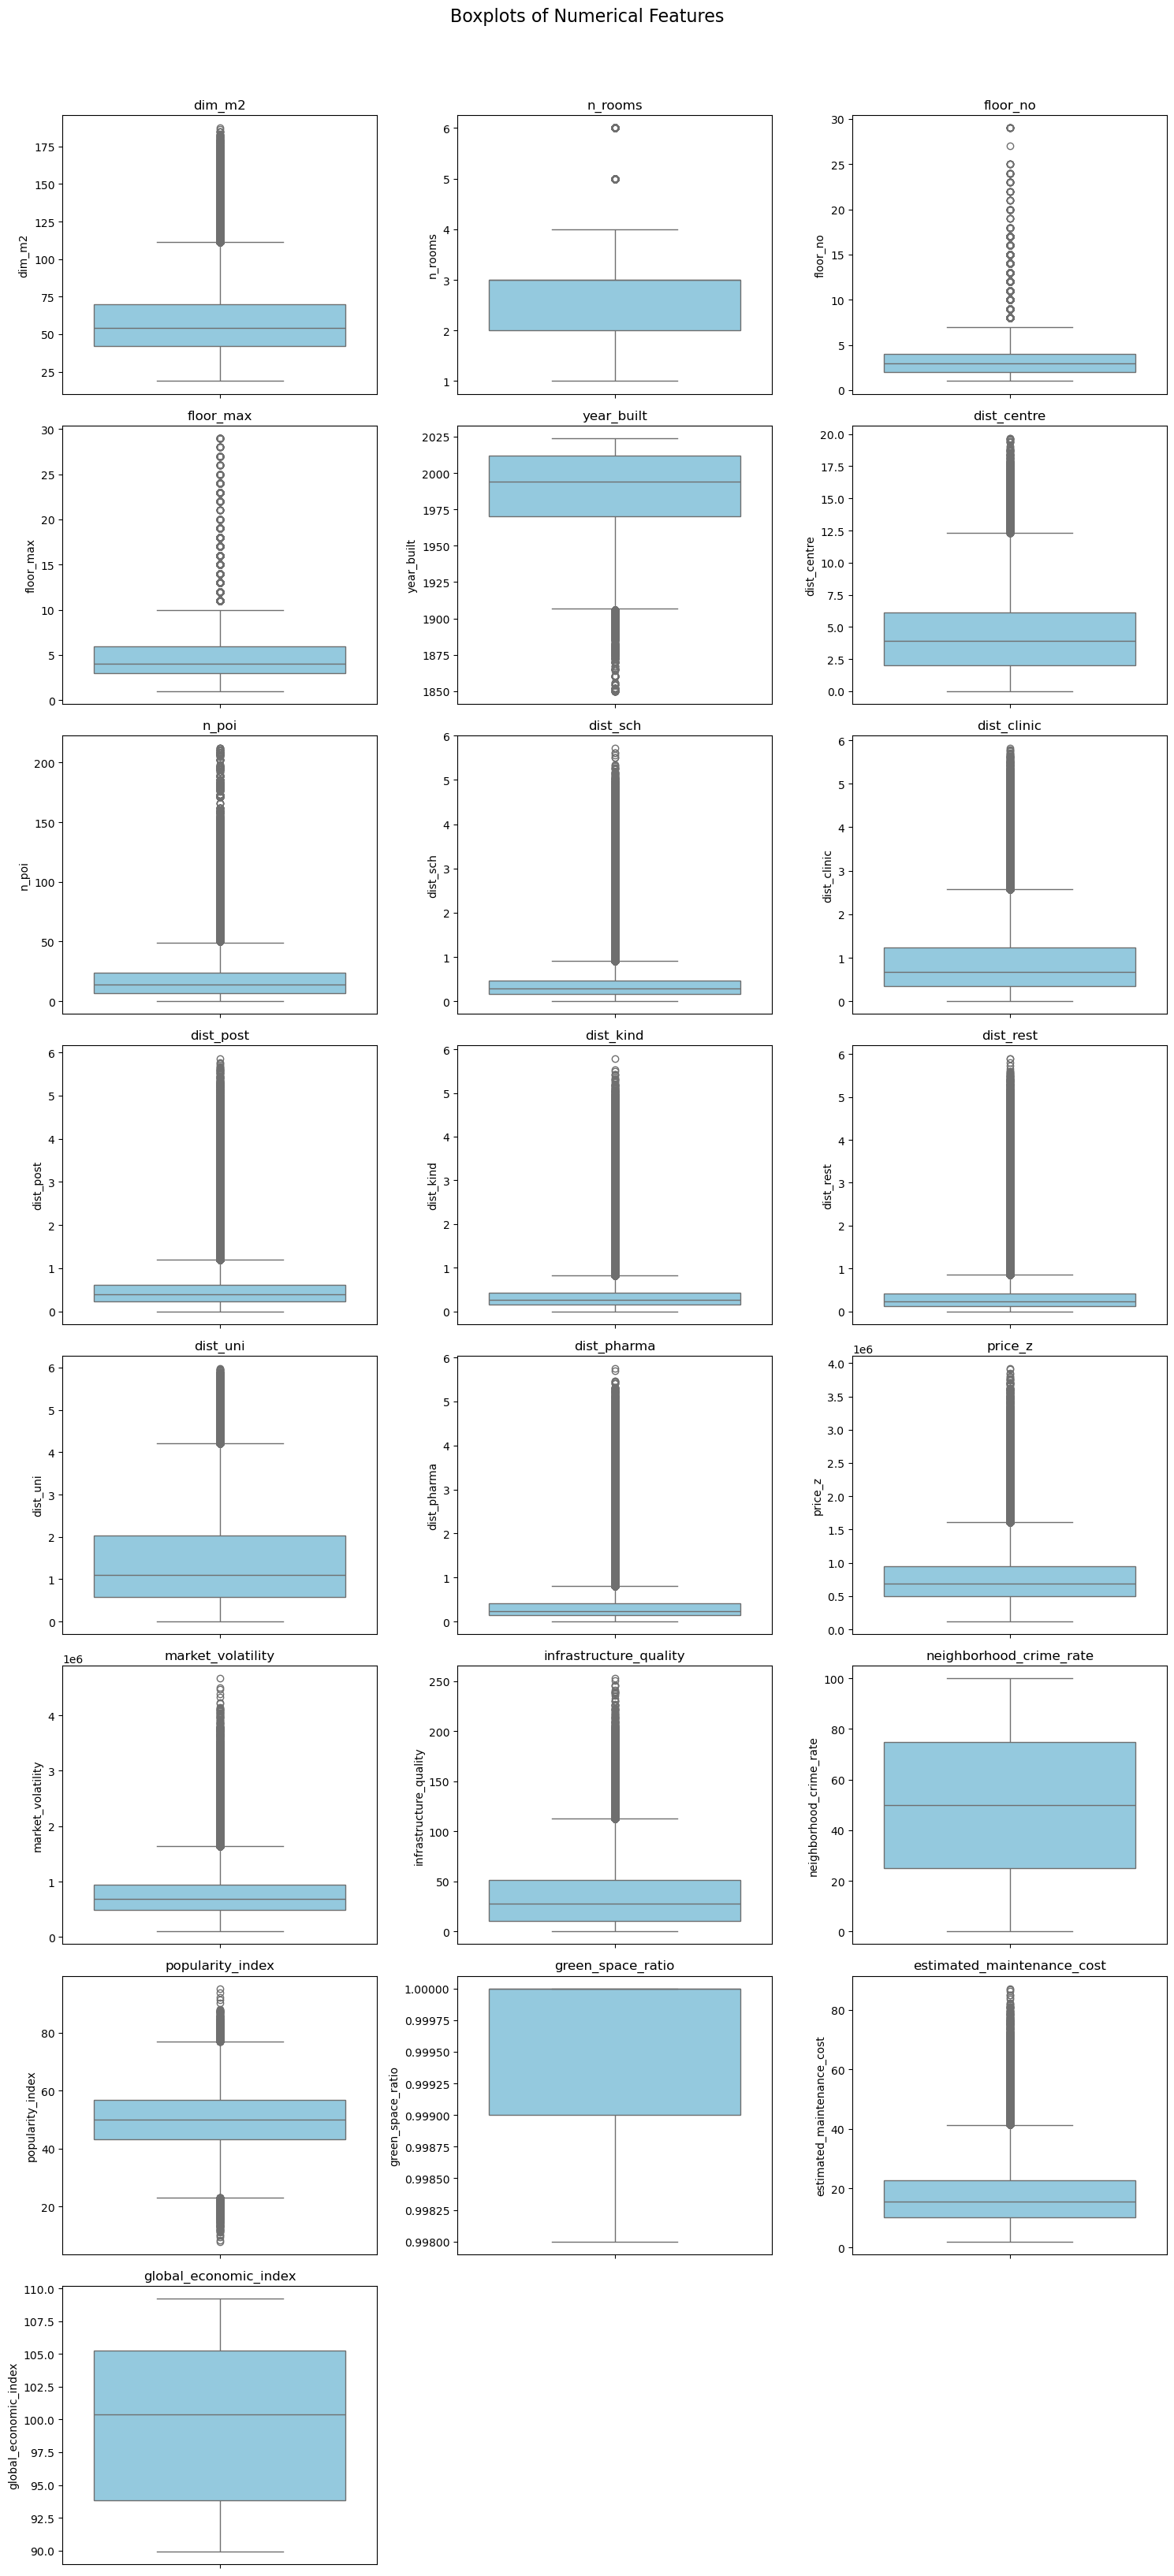

In [15]:
#checking outliers
n_cols = 3  # Number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# Feature Engineering

Normalization and scaling of data is necessary to have a better regression outcome.
1. `year_built` is used to create `property_age`.

In [59]:
# Create 'property_age' feature
current_year = datetime.datetime.now().year
df['property_age'] = current_year - df['year_built']
df_test['property_age'] = current_year - df_test['year_built']

# check the transformed data
print(df['property_age'].describe())

count    156454.000000
mean         37.676410
std          31.032818
min           1.000000
25%          13.000000
50%          31.000000
75%          55.000000
max         175.000000
Name: property_age, dtype: float64


2. `dim_m2` / `n_rooms` to create average room size.

In [60]:
df['avg_room_size'] = df['dim_m2'] / df['n_rooms']
df_test['avg_room_size'] = df_test['dim_m2'] / df_test['n_rooms']

print(df['avg_room_size'].describe())

count    156454.000000
mean         22.370138
std           5.667930
min           4.840000
25%          18.210000
50%          21.673333
75%          25.810000
max          43.750000
Name: avg_room_size, dtype: float64


3. The number of floors of the buildings are normalised by creating a `floor_ratio` feature with `floor_no` / `floor_max`.

In [61]:
df['floor_ratio'] = df['floor_no'] / df['floor_max']
df_test['floor_ratio'] = df_test['floor_no'] / df_test['floor_max']

print(df['floor_ratio'].describe())

count    156454.000000
mean          0.691742
std           0.369365
min           0.041667
25%           0.428571
50%           0.750000
75%           1.000000
max           3.000000
Name: floor_ratio, dtype: float64


4. As shown in the histogram above in EDA, `price_z` is heavily skewed so a *log transformation* is done so it follows a normal distribution.

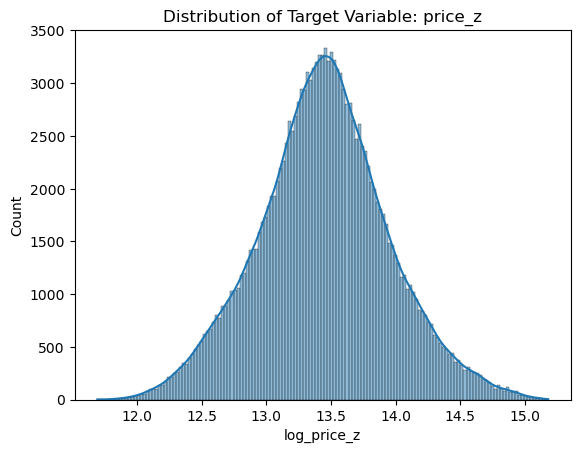

In [62]:
df['log_price_z'] = np.log1p(df['price_z'])
sns.histplot(df['log_price_z'], kde=True)
plt.title('Distribution of Target Variable: price_z')
plt.show()

5. Other features are normalized using `StandardScaler` from `sklearn`.

In [63]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# exclude the target column since it is already transformed
numerical_cols.remove('log_price_z')  
numeric_cols_test = numerical_cols.remove('price_z')

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled_test = df_test.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])
df_scaled_test[numerical_cols] = scaler.transform(df_scaled_test[numerical_cols])

6. Categorical variables require to be encoded before data modelling
    - One-Hot Encoding for Nominal Variables
    - Label Encoding for Ordinal Variables

For columns with `yes` and `no`, they will be encoded with 0 and 1; whereas one-hot encoding is applied in the other non-numerical columns.

In [64]:
binary_cols = ['has_lift', 'has_park', 'has_balcony', 'has_sec', 'has_store']

for col in binary_cols:
    df_scaled[col] = df_scaled[col].replace({'yes': 1, 'no': 0}).astype(int)

for col in binary_cols:
    df_scaled_test[col] = df_scaled_test[col].replace({'yes': 1, 'no': 0}).astype(int)

# Verify
print(df_scaled[binary_cols].head())
print(df_scaled_test[binary_cols].head())

   has_lift  has_park  has_balcony  has_sec  has_store
0         1         1            1        0          1
1         0         1            1        0          0
2         0         0            1        0          1
3         1         1            0        0          0
4         1         1            1        0          0
   has_lift  has_park  has_balcony  has_sec  has_store
0         0         1            1        0          1
1         0         0            0        0          0
2         0         0            0        0          1
3         1         0            1        0          0
4         0         0            0        0          1


/var/folders/n3/g2nx70tx0g99d7qn9bb6zqm00000gp/T/ipykernel_3693/889886285.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled[col] = df_scaled[col].replace({'yes': 1, 'no': 0}).astype(int)
/var/folders/n3/g2nx70tx0g99d7qn9bb6zqm00000gp/T/ipykernel_3693/889886285.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled[col] = df_scaled[col].replace({'yes': 1, 'no': 0}).astype(int)
/var/folders/n3/g2nx70tx0g99d7qn9bb6zqm00000gp/T/ipykernel_3693/889886285.py:4: FutureWarning: Downcasting behavior in `replace` is deprec

In [65]:
categorical_cols = ['obj_type', 'own_type', 'build_mat', 'loc_code']

# 1. One-hot encode ONLY training data
df_scaled = pd.get_dummies(df_scaled, columns=categorical_cols)
df_scaled_test = pd.get_dummies(df_scaled_test, columns=categorical_cols)

# 2. Store the expected columns for future test data
expected_columns = df_scaled.columns.tolist()


In [66]:
df_scaled['src_month'] = pd.to_datetime(df_scaled['src_month'])
df_scaled['year'] = df_scaled['src_month'].dt.year
df_scaled['month'] = df_scaled['src_month'].dt.month

In [67]:
df_scaled_test['src_month'] = pd.to_datetime(df_scaled_test['src_month'])
df_scaled_test['year'] = df_scaled_test['src_month'].dt.year
df_scaled_test['month'] = df_scaled_test['src_month'].dt.month
df_scaled_test = df_scaled_test.drop(columns=['src_month'])

# Modeling

The model is trained in the scale of logarithm of price_z.

In [102]:
# Define features (X) and target (y)
X_train = df_scaled.drop(columns=['unit_id', 'price_z', 'log_price_z', 'src_month'])  # Drop the target and non-feature columns
y_train = df_scaled['log_price_z']

In [88]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Linear Regression CV RMSE: {rmse_scores.mean():.4f} (±{rmse_scores.std():.4f})")

Linear Regression CV RMSE: 0.1611 (±0.0010)


In [ ]:
# Initialize model
lr = LinearRegression()
# Cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print("Linear Regression CV Mean MSE:", cv_scores.mean())

# Ridge Regression
ridge = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Ridge Regression CV Mean MSE:", cv_scores_ridge.mean())

# Lasso Regression
lasso = Lasso(alpha=0.1)
cv_scores_lasso = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Lasso Regression CV Mean MSE:", cv_scores_lasso.mean())

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
cv_scores_en = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("ElasticNet Regression CV Mean MSE:", cv_scores_en.mean())

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("KNN Regression CV Mean MSE:", cv_scores_knn.mean())

# Support Vector Regression (SVR)
svr = SVR(kernel='rbf', C=1, epsilon=0.1)
cv_scores_svr = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("SVR CV Mean MSE:", cv_scores_svr.mean())
#SVR CV Mean MSE: -0.1845576328873048

Linear Regression CV Mean MSE: -0.02595396666359675
Ridge Regression CV Mean MSE: -0.02595394402844726
Lasso Regression CV Mean MSE: -0.0540357692448865
ElasticNet Regression CV Mean MSE: -0.04826379637638965
KNN Regression CV Mean MSE: -0.04486756530539033


## Internal division of training data 
Internal division of trainng data is used to split data into train, validation and test samples to correctly assess performance of models on new data.

X_train_internal, y_train_internal → For training and cross-validation

X_val, y_val → For model selection & hyperparameter tuning.

X_test_internal, y_test_internal → For final internal evaluation.

In [89]:
# First split: Train (70%) and temp (30%)
X_train_internal, X_temp, y_train_internal, y_temp = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Second split: Validation (15%) and internal test (15%)
X_val, X_test_internal, y_val, y_test_internal = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [90]:
# List of supplementary variables
supplementary_vars = [
    'market_volatility', 'infrastructure_quality', 'neighborhood_crime_rate',
    'popularity_index', 'green_space_ratio', 'estimated_maintenance_cost',
    'global_economic_index'
]

# Base and full for train_internal
X_base_train = X_train_internal.drop(columns=supplementary_vars)
X_full_train = X_train_internal.copy()

# Base and full for val
X_base_val = X_val.drop(columns=supplementary_vars)
X_full_val = X_val.copy()

# Base and full for test_internal
X_base_test = X_test_internal.drop(columns=supplementary_vars)
X_full_test = X_test_internal.copy()

- Finds the best alpha for Ridge regression by testing 5 values (0.01 to 100) using 5-fold cross-validation.
- The prediction is then done on the internal validation test set

In [91]:
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_internal, y_train_internal)

print("Best alpha:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best alpha: {'alpha': 10}
Best CV score: -0.025895679331740508


In [92]:
best_ridge = grid.best_estimator_
val_preds = best_ridge.predict(X_val)
val_mse = mean_squared_error(y_val, val_preds)
print("Validation MSE:", val_mse)

Validation MSE: 0.0263093569701555


In [93]:
ridge_base = Ridge(alpha=1.0)
ridge_base.fit(X_base_train, y_train_internal)

y_pred_base = ridge_base.predict(X_base_test)
mse_base = mean_squared_error(y_test_internal, y_pred_base)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_test_internal, y_pred_base)

In [94]:
ridge_full = Ridge(alpha=1.0)
ridge_full.fit(X_full_train, y_train_internal)

y_pred_full = ridge_full.predict(X_full_test)
mse_full = mean_squared_error(y_test_internal, y_pred_full)
rmse_full = np.sqrt(mse_full)
r2_full = r2_score(y_test_internal, y_pred_full)


print("Ridge Base RMSE:", rmse_base, "| R²:", r2_base)
print(f"Ridge Full RMSE: {rmse_full:.4f} | R²: {r2_full:.4f}")

Ridge Base RMSE: 0.25260958215969337 | R²: 0.7482648362692719
Ridge Full RMSE: 0.1608 | R²: 0.8980


In [95]:
from sklearn.neighbors import KNeighborsRegressor
# --- BASE model (excluding supplementary variables)
knn_base = KNeighborsRegressor(n_neighbors=5)  # You can tune this later
knn_base.fit(X_base_train, y_train_internal)

y_pred_base = knn_base.predict(X_test_internal[X_base_train.columns])
rmse_base = np.sqrt(mean_squared_error(y_test_internal, y_pred_base))
r2_base = r2_score(y_test_internal, y_pred_base)

print(f"📉 KNN Base RMSE: {rmse_base:.4f} | R²: {r2_base:.4f}")

# --- FULL model (including all features)
knn_full = KNeighborsRegressor(n_neighbors=5)
knn_full.fit(X_full_train, y_train_internal)

y_pred_full = knn_full.predict(X_test_internal[X_full_train.columns])
rmse_full = np.sqrt(mean_squared_error(y_test_internal, y_pred_full))
r2_full = r2_score(y_test_internal, y_pred_full)

print(f"📊 KNN Full RMSE: {rmse_full:.4f} | R²: {r2_full:.4f}")

📉 KNN Base RMSE: 0.2581 | R²: 0.7372
📊 KNN Full RMSE: 0.2152 | R²: 0.8173


## Ridge Regression

Ridge regression generates the relatively higher R-squared values and lower RMSE value among all models, also it is one of the fastest model, hence it is used to fine-tune and finally to predict the final test data.

In [96]:
ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 50)}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_full_train, y_train_internal)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best CV Score (MSE): {-grid_search.best_score_}")

Best alpha: 5.428675439323859
Best CV Score (MSE): 0.025895608320188945


### Comparison of internal base model and model with supplementary variables

These results clearly show that adding the supplementary variables significantly improves model performance.

In [97]:
best_ridge = Ridge(alpha=grid_search.best_params_['alpha'])  # or ridge_cv.alpha_
best_ridge.fit(X_full_train, y_train_internal)

# Predict and evaluate
y_pred_val = best_ridge.predict(X_full_val)
y_pred_test = best_ridge.predict(X_full_test)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

rmse_test = np.sqrt(mean_squared_error(y_test_internal, y_pred_test))
r2_test = r2_score(y_test_internal, y_pred_test)

print(f"Validation RMSE: {rmse_val:.4f} | R²: {r2_val:.4f}")
print(f"Test RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")

Validation RMSE: 0.1622 | R²: 0.8961
Test RMSE: 0.1608 | R²: 0.8980


In [98]:
ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 50)}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_base_train, y_train_internal)

best_ridge = Ridge(alpha=grid_search.best_params_['alpha'])  # or ridge_cv.alpha_
best_ridge.fit(X_base_train, y_train_internal)

# Predict and evaluate
y_pred_val = best_ridge.predict(X_base_val)
y_pred_test = best_ridge.predict(X_base_test)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

rmse_test = np.sqrt(mean_squared_error(y_test_internal, y_pred_test))
r2_test = r2_score(y_test_internal, y_pred_test)

print(f"Validation RMSE: {rmse_val:.4f} | R²: {r2_val:.4f}")
print(f"Test RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")

Validation RMSE: 0.2547 | R²: 0.7438
Test RMSE: 0.2526 | R²: 0.7483


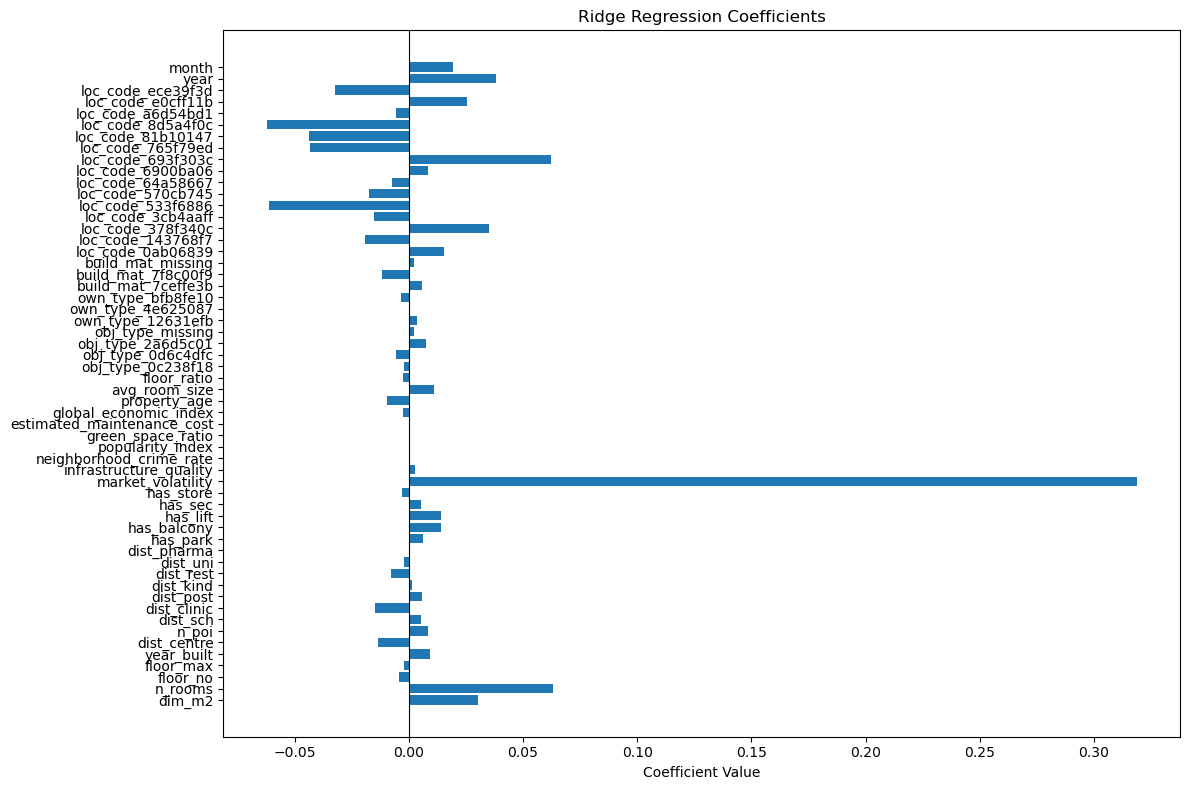

In [99]:
# Ridge pipeline (with standard scaling)
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Alpha values to search over
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid search on validation data
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_full_train, y_train_internal)


# Extract coefficients
ridge_best = ridge_grid.best_estimator_.named_steps['ridge']
coefs = ridge_best.coef_
features = X_full_train.columns

# Plot
plt.figure(figsize=(12, 8))
plt.barh(features, coefs)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

### Fit the training model on the complete training set excluding internal test set
Internal test set is excluded from the complete training dataset and the full training model will be applied to the complete test data.

In [100]:
X_train_complete = pd.concat([X_train_internal, X_val])
y_train_complete = pd.concat([y_train_internal, y_val])

In [103]:
test_ids = df_scaled_test['unit_id']
X_test = df_scaled_test.drop(columns=['unit_id'])

## Prediction on test dataset
Since we have obtained the best alpha value, 5.428675439323859 from hyperparameter tuning above, it will be used for final testing on test dataset. 

The final model is fit on complete training dataset. Final trained model is saved as a joblib file.

Then, it was used to train on full test set.

Since the final data predicted is in logarithm scale, it will be reverted using its exponential to original `price_z` scale.

Finally, the prediction results, comprises the **ogarithm of price_z and price_z** are saved into dataframe in `predictions.csv`.

In [105]:
# Final best alpha from tuning
best_alpha = 5.428675439323859

# Fit on the complete training set
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train_complete, y_train_complete)

# Save the trained model
dump(ridge_final, 'ridge_model.joblib')

# Predict on the full test set
y_pred_log = ridge_final.predict(X_test)

# Reverse log1p transformation to get actual price predictions
y_pred_price = np.expm1(y_pred_log)

# Create a DataFrame with unit_id and predicted_price only
df_predictions = pd.DataFrame({
    'unit_id': test_ids,  # Make sure test_data includes unit_id
    'predicted_price': y_pred_price
})

# Save to CSV without index
df_predictions.to_csv('predictions.csv', index=False)

print("Model saved as 'ridge_model.joblib'")
print("Predictions saved to 'predictions.csv' (includes only unit_id and predicted_price)")


Model saved as 'ridge_model.joblib'
Predictions saved to 'predictions.csv' (includes only unit_id and predicted_price)
